# **Teeth Caries Annotation Info**

---



# **Importing Libraries and Setting Paths**




In [ ]:
import os
import cv2
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# **Kaggle API Setup and Dataset Download**

In [ ]:
! chmod 600 /content/kaggle.json

In [ ]:
! KAGGLE_CONFIG_DIR=/content/ kaggle datasets download -d thunderpede/panoramic-dental-dataset

 96% 233M/244M [00:02<00:00, 92.2MB/s]
100% 244M/244M [00:02<00:00, 111MB/s] 


In [ ]:
! unzip -q /content/panoramic-dental-dataset.zip -d /content/panoramic

# **Getting Annotation Paths for Caries and Teeth**

In [ ]:
anno_paths=[]
for dirname, _, filenames in os.walk('/content/panoramic/annotations/bboxes_caries'):
    for filename in filenames:
        anno_paths+=[(os.path.join(dirname, filename))]

anno_paths.sort()

In [ ]:
anno_paths2=[]
for dirname, _, filenames in os.walk('/content/panoramic/annotations/bboxes_teeth'):
    for filename in filenames:
        anno_paths2+=[(os.path.join(dirname, filename))]

anno_paths2.sort()

In [ ]:
print(anno_paths[0:1])
print(anno_paths2[0:1])

['/content/panoramic/annotations/bboxes_caries/1008.txt']
['/content/panoramic/annotations/bboxes_teeth/1008.txt']


# **Displaying Sample Image with Caries Annotations**

In [ ]:
for path in anno_paths[0:1]:
    file=path.split('/')[-1][0:-4]+'.png'
    img_path=os.path.join('/content/panoramic/images_cut',file)
    with open(path, 'r') as file:
        text = file.read().strip().split("\n")
    data = [line.split() for line in text]
    box = pd.DataFrame(data)
    display(box)
    img=plt.imread(img_path)

    plt.imshow(img)
    #plt.axis('off')
    plt.show()

0    1     2    3
0   434  297   486  364
1  1130  322  1161  355
2  1176  334  1185  342
3   801  366   816  400
4   783  380   791  397

In [ ]:
for path in anno_paths2[0:1]:
    file=path.split('/')[-1][0:-4]+'.png'
    img_path=os.path.join('/content/panoramic/images',file)
    with open(path, 'r') as file:
        text = file.read().strip().split("\n")
    data = [line.split() for line in text]
    box = pd.DataFrame(data).astype(float)
    display(box)
    img=plt.imread(img_path)

    plt.imshow(img)
    #plt.axis('off')
    plt.show()

0           1            2            3
0    697.573181  697.510986   900.908508   861.750488
1   1905.033447  715.254211  2122.338867   966.247070
2   2056.297852  707.747009  2269.509277   874.480896
3   1104.463501  478.137115  1186.843262   717.872803
4    851.793701  712.251892  1029.780029   969.373108
5   1668.369141  789.385620  1841.557129  1039.846313
6    868.844055  435.959656   986.293274   680.141602
7   1749.554443  755.705078  1981.494263  1015.743713
8   1662.300049  441.303528  1751.113281   777.804199
9   1259.090210  427.306244  1341.740356   741.280640
10   984.436951  448.425568  1112.215942   707.143188
11  1414.861328  474.103424  1503.931152   768.715393
12  1108.214600  788.184937  1225.217651  1028.584106
13   965.822266  749.550598  1163.455444  1012.961914
14  1506.141602  482.399750  1593.335938   774.386780
15  1198.553467  792.418640  1300.187500  1029.588745
16  1626.557129  836.311584  1714.637573  1055.520020
17  1590.545410  488.517883  1669.810059   771.266174
18  1342.980347  481.205383  1415.639160   754.298096
19  1179.474487  465.245483  1269.030029   729.885193
20  1252.553711  803.016174  1364.701538  1048.632080
21  1352.116333  791.243469  1415.030396  1018.668823
22  2062.791504  444.635284  2189.505127   654.388733
23  1829.985840  477.608948  1959.812012   715.272156
24  1551.117432  817.445679  1628.968994  1073.819458
25  1448.107788  803.831909  1504.264648  1010.249939
26  1735.749512  470.808502  1844.009277   743.029053
27  1392.423340  801.696594  1455.900024  1013.613159
28  1955.704834  454.699890  2088.166748   691.965393
29  1498.576782  810.449524  1556.071289  1014.388306

# **Drawing Bounding Boxes on Images (Functions)**

In [ ]:
def draw_box(anno_path):
    file=anno_path.split('/')[-1][0:-4]+'.png'
    img_path=os.path.join('/content/panoramic/images_cut',file)
    with open(anno_path, 'r') as file:
        text = file.read().strip().split("\n")
    data = [line.split() for line in text]
    box = pd.DataFrame(data)
    box = box.astype(float)
    image = plt.imread(img_path)
    H,W = image.shape[0],image.shape[1]
    #print(H,W)
    for i in range(len(box)):#
        x1=int(box.loc[i,0])
        y1=int(box.loc[i,1])
        x2=int(box.loc[i,2])
        y2=int(box.loc[i,3])

        cv2.rectangle(image,(x1,y1),(x2,y2),(0,255,0),2) #green

    plt.imshow(image)
    #plt.axis('off')
    plt.show()

# **Displaying Image with Caries Bounding Boxes Using Function**

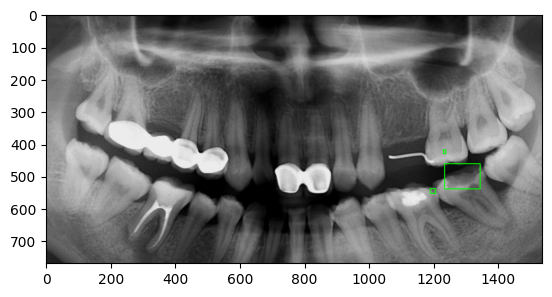

In [ ]:
draw_box(anno_paths[8])

In [ ]:
def draw_box2(anno_path):
    file=anno_path.split('/')[-1][0:-4]+'.png'
    img_path=os.path.join('/content/panoramic/images',file)
    with open(anno_path, 'r') as file:
        text = file.read().strip().split("\n")
    data = [line.split() for line in text]
    box = pd.DataFrame(data)
    box = box.astype(float)
    image = plt.imread(img_path)
    H,W = image.shape[0],image.shape[1]
    #print(H,W)
    for i in range(len(box)):#
        x1=int(box.loc[i,0])
        y1=int(box.loc[i,1])
        x2=int(box.loc[i,2])
        y2=int(box.loc[i,3])

        cv2.rectangle(image,(x1,y1),(x2,y2),(0,255,0),2) #green

    plt.imshow(image)
    #plt.axis('off')
    plt.show()

# **Displaying Image with Teeth Bounding Boxes Using Function**

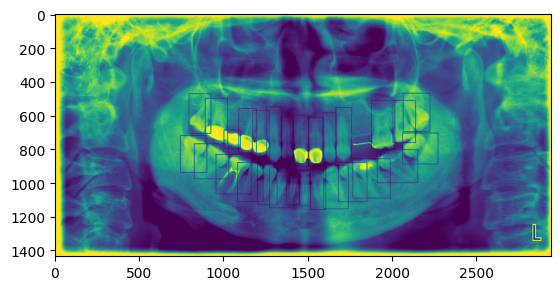

In [ ]:
draw_box2(anno_paths2[8])

# **Displaying Random Images with Caries Bounding Boxes**

In [ ]:
paths=random.sample(anno_paths,10)
paths2=random.sample(anno_paths2,10)

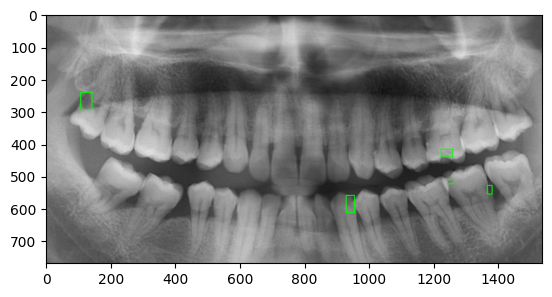

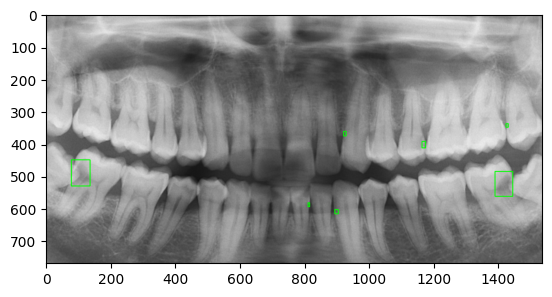

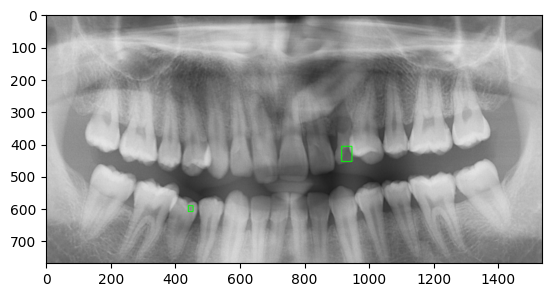

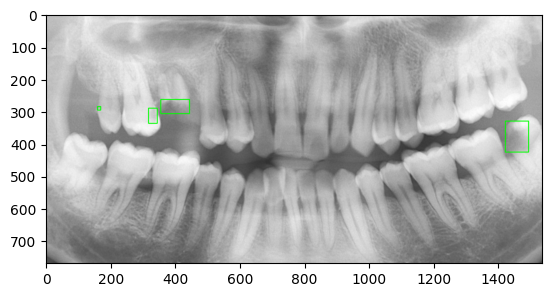

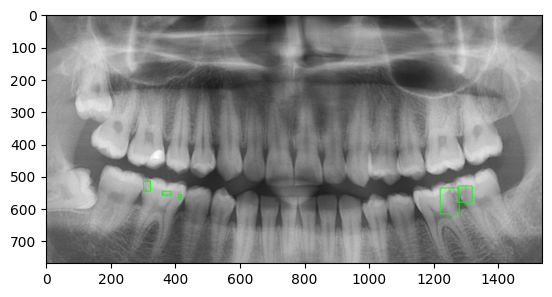

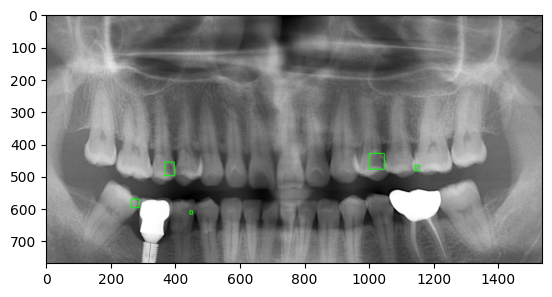

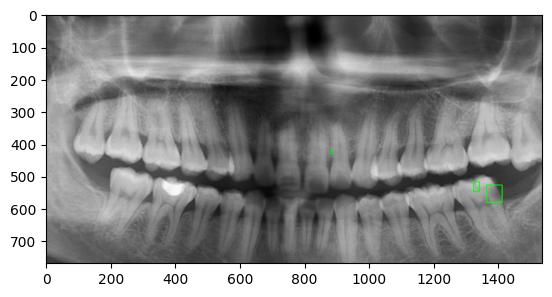

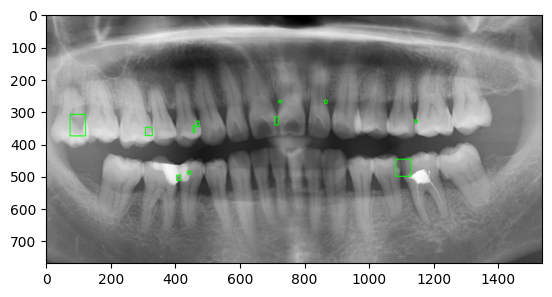

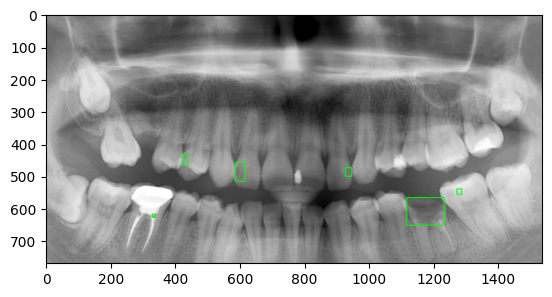

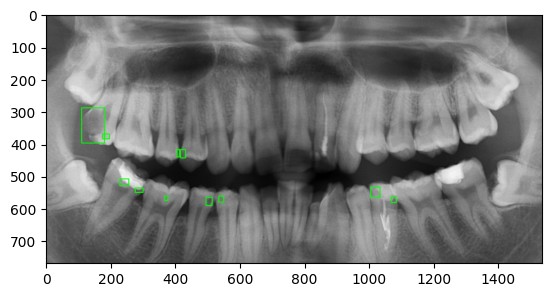

In [ ]:
for path in paths:
    draw_box(path)

# **Displaying Random Images with Teeth Bounding Boxes**

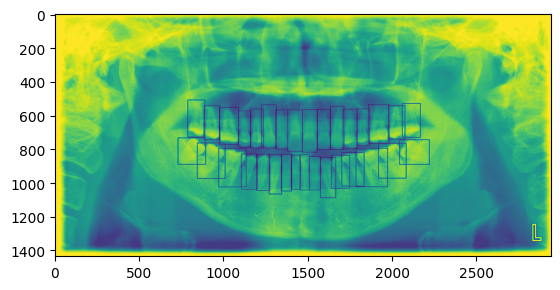

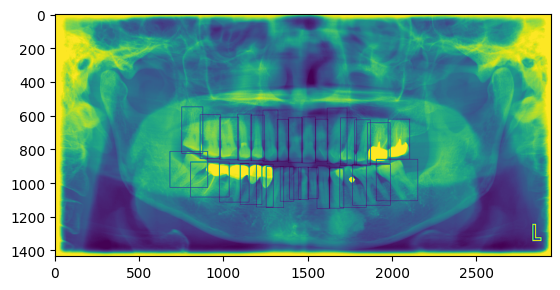

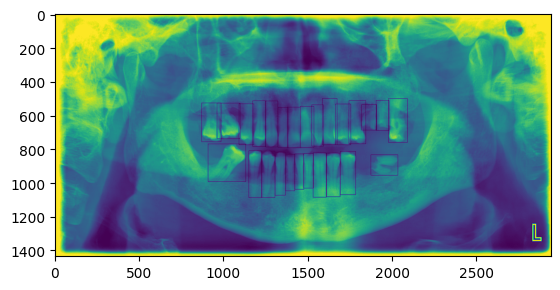

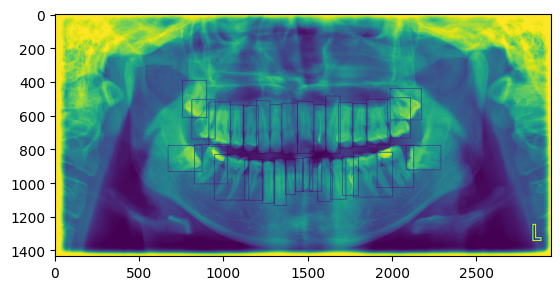

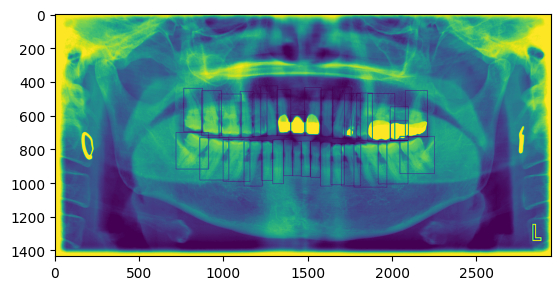

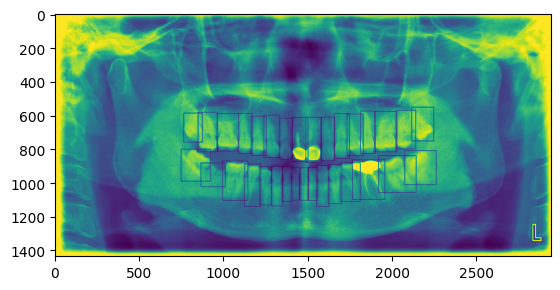

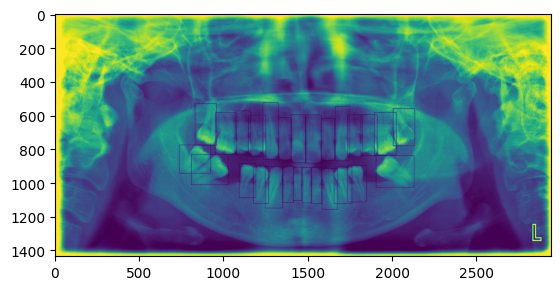

In [ ]:
for path in paths2:
    draw_box2(path)

# **Save Annotation Paths to a Text File**

In [ ]:
# Specify the file path where you want to save the annotation paths
save_path = '/content/panoramic/annotation_paths.txt'

# Write the annotation paths to the file
with open(save_path, 'w') as file:
    for path in anno_paths:
        file.write(path + '\n')

print(f'Annotation paths have been saved to: {save_path}')

Annotation paths have been saved to: /content/panoramic/annotation_paths.txt
